In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.utils import shuffle
import sklearn 
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.preprocessing import StandardScaler

import random
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt



In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [3]:
from tqdm.auto import tqdm

In [4]:
Data = pd.read_csv("./breath_csv_2/Breath.csv")

In [5]:
#Extracting Asthmatic Patients
unique = np.unique(Data.iloc[:,73])
asthmatic = np.array([i for i in unique if i.find("sthma") != -1])

In [6]:
B = pd.DataFrame()
for i in asthmatic:
    B = B.append(Data[Data.iloc[:,73] == i])
    

In [7]:
#Correcting asthma
B.iloc[:,72] = 1

In [8]:
B.describe()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,...,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.0
mean,-2.399395,-8.676384,-6.561204,-2.444923,-1.860901,0.316062,0.191290,-6.435838,1.355603,3.191651,...,10.206830,10.366000,11.542341,11.333722,13.101533,11.129931,11.263502,10.568098,9.747384,1.0
std,2.136725,6.433313,6.846512,6.351762,6.126254,6.696126,6.528696,6.591321,6.115528,5.441426,...,3.861176,3.190467,3.677585,3.496730,4.284381,3.388054,3.249843,2.657779,2.273808,0.0
min,-7.290914,-34.238294,-24.821617,-27.542506,-21.237323,-21.947470,-20.243522,-30.148841,-40.224962,-14.943472,...,4.214104,4.747960,5.677547,6.213392,6.399027,7.005029,6.759352,6.842324,6.293458,1.0
25%,-3.967750,-12.349949,-10.848096,-6.023033,-5.924660,-3.863927,-3.832897,-10.437591,-1.769591,-0.321488,...,7.489774,8.027686,8.774171,8.896191,9.987508,8.927366,8.906559,8.661712,8.209990,1.0
50%,-2.248437,-8.269063,-6.426706,-2.098232,-1.608935,0.073297,-0.338574,-6.223815,1.430799,2.691115,...,9.585270,9.791394,11.027621,10.575171,12.078608,10.309119,10.279591,9.825199,9.201867,1.0
75%,-0.885740,-4.121017,-2.111804,1.480339,2.414981,4.423593,3.761875,-1.888421,5.273373,6.546122,...,11.885978,11.998039,13.302672,12.873919,15.369944,12.169417,12.814694,11.728963,10.610849,1.0
max,3.831121,6.215498,29.247806,16.933956,27.892517,32.231597,25.013653,10.484098,21.058883,24.620917,...,30.011101,28.791603,35.349213,30.398060,35.632432,42.908516,31.641067,23.574602,24.818823,1.0


In [9]:
B.reset_index(inplace=True,drop=True )

In [10]:
before = [i for i in unique if i.find("efore") != -1]
after = [i for i in unique if i.find("fter") != -1]
print(f"Before: {len(before)}, after: {len(after)}")

Before: 67, after: 101


In [11]:
# Before = 0
# After = 1
C = pd.DataFrame()
for i in before:
    C = C.append(B[B.iloc[:,73] == i])
C.iloc[:,72] = 0
      
        
for i in after:
    C = C.append(B[B.iloc[:,73] == i])
        

In [12]:
C.describe()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
count,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,...,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000,1478.000000
mean,-2.399395,-8.676384,-6.561204,-2.444923,-1.860901,0.316062,0.191290,-6.435838,1.355603,3.191651,...,10.206830,10.366000,11.542341,11.333722,13.101533,11.129931,11.263502,10.568098,9.747384,0.606225
std,2.136725,6.433313,6.846512,6.351762,6.126254,6.696126,6.528696,6.591321,6.115528,5.441426,...,3.861176,3.190467,3.677585,3.496730,4.284381,3.388054,3.249843,2.657779,2.273808,0.488751
min,-7.290914,-34.238294,-24.821617,-27.542506,-21.237323,-21.947470,-20.243522,-30.148841,-40.224962,-14.943472,...,4.214104,4.747960,5.677547,6.213392,6.399027,7.005029,6.759352,6.842324,6.293458,0.000000
25%,-3.967750,-12.349949,-10.848096,-6.023033,-5.924660,-3.863927,-3.832897,-10.437591,-1.769591,-0.321488,...,7.489774,8.027686,8.774171,8.896191,9.987508,8.927366,8.906559,8.661712,8.209990,0.000000
50%,-2.248437,-8.269063,-6.426706,-2.098232,-1.608935,0.073297,-0.338574,-6.223815,1.430799,2.691115,...,9.585270,9.791394,11.027621,10.575171,12.078608,10.309119,10.279591,9.825199,9.201867,1.000000
75%,-0.885740,-4.121017,-2.111804,1.480339,2.414981,4.423593,3.761875,-1.888421,5.273373,6.546122,...,11.885978,11.998039,13.302672,12.873919,15.369944,12.169417,12.814694,11.728963,10.610849,1.000000
max,3.831121,6.215498,29.247806,16.933956,27.892517,32.231597,25.013653,10.484098,21.058883,24.620917,...,30.011101,28.791603,35.349213,30.398060,35.632432,42.908516,31.641067,23.574602,24.818823,1.000000


In [13]:
C.reset_index(drop=True, inplace=True)

In [15]:
shuffle(C).head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
232,-1.526600,-6.732589,-9.931094,-1.651994,3.447342,-2.308044,-5.306336,3.313477,3.688957,6.402482,...,10.964051,9.489141,9.839491,10.734899,11.629230,11.033540,9.252763,8.529384,0,4410_P_Asthma_F_before_Mod_Y.json
1218,-4.351403,-7.786120,-6.084539,-6.188765,5.671149,-1.873003,9.190425,-9.180245,0.208363,6.858840,...,9.522684,11.608110,12.862478,15.925645,11.119058,10.435333,8.676207,8.561430,1,4807_P_NAsthma_M_After_Na_Y.json
1114,-1.307408,-14.146324,-1.077585,-8.778155,-2.922474,-9.991428,2.943174,-2.892652,0.591235,1.532002,...,8.832895,12.409166,8.476895,9.861664,8.694209,11.255215,13.678960,9.843259,1,4706_P_Asthma_M_after_Sev_Y.json
1016,-6.318734,-8.884831,-14.759457,0.140612,-11.834065,8.996113,-6.125538,-22.801141,12.316191,1.952712,...,13.579102,12.651525,9.575618,24.482864,15.236189,8.275985,9.436982,8.670864,1,4604_P_Asthma_F_after_Sev_Y.json
1059,-2.725098,-7.783341,-1.173748,2.616080,-2.657245,-5.409228,-4.914848,-4.081733,-0.700995,1.558977,...,6.809708,11.481925,9.824044,9.973204,7.925847,7.971088,11.054970,9.371802,1,4641_P_Asthma_F_after_TBD_Y.json


## Experiment_1: Random No m/f ratio maintained.

In [16]:
def count(list_array, print_dist = True, ret = None):
    Total = list_array
    name = []
    for i in Total:
        name.append(i[:4])
    unique = []
    before_after = []
    for i in Total:
        if np.sum((np.array(name, dtype = int) == int(i[:4]))) == 1:
            unique.append(i)
        else:
            before_after.append(i) 

    Asthmatic_Female = []
    Asthmatic_Male = []
    Healthy_Male = []
    Healthy_Female = []
    NAsthma = []
    before = {"male" : [], "female" : []}
    after = {"male" : [], "female" : []}
    for file in unique:
        if file.split("_")[2] == 'Asthma' or file.split("_")[2] == 'asthma' :
            if file.find("_M_")!=-1:
                Asthmatic_Male.append(file)
            if file.find("_F_")!=-1:
                Asthmatic_Female.append(file)
        if file.split("_")[2] == 'NAsthma':
            NAsthma.append(file)
        if file.find("_C_")!=-1:
            if file.find("_M_")!=-1:
                Healthy_Male.append(file)
            if file.find("_F_")!=-1:
                Healthy_Female.append(file)

    for file in before_after:
            if file.find("efore") != -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    before["male"].append(file)
                if file.find("_F_")!=-1:
                    before["female"].append(file)
            if file.find("fter")!= -1:
                if file.find("_M_") != -1 or file.find("_m_")!=-1:
                    after["male"].append(file)
                if file.find("_F_")!=-1:
                    after["female"].append(file)
    if print_dist:
        print(f"Total = {len(Total)}")
        print(f"Asthmatic_male = {len(Asthmatic_Male)+ len(before['male'])+len(after['male'])}")
        print(f"Asthmatic_female = {len(Asthmatic_Female)+ len(before['female'])+len(after['female'])}")
        print(f"Healthy_Male = {len(Healthy_Male)}")
        print(f"Healthy_female = {len(Healthy_Female)}")
        print(f"Asthmatic_male_unique = {len(Asthmatic_Male)}")
        print(f"Asthmatic_female_unique = {len(Asthmatic_Female)}")
        print(f"Before_after = {len(before_after)}")
        print(f"Before_male = {len(before['male'])}")
        print(f"Before_female = {len(before['female'])}")
        print(f"after_male = {len(after['male'])}")
        print(f"after_female = {len(after['female'])}")
        print(f"NAsthma = {len(NAsthma)}")
        
              
    if ret != None:
        D = {"Total": Total, "Asthmatic_male": Asthmatic_Male, "Asthmatic_female": Asthmatic_Female, "Healthy_Male": Healthy_Male,
            "Healthy_Female": Healthy_Female, "before_after": before_after, "before": before, "after": after}
        return D[ret]

In [17]:
count(list(np.unique(C.iloc[:,73])))

Total = 168
Asthmatic_male = 90
Asthmatic_female = 68
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 46
Asthmatic_female_unique = 28
Before_after = 84
Before_male = 22
Before_female = 20
after_male = 22
after_female = 20
NAsthma = 10


In [29]:
# making 5 fold setup without maintaing m/f ratio and subject pairs
Total = np.unique(C.iloc[:,73])
Total = shuffle(Total)

for i in range(0,5):
    Test = Total[28*i:28+28*i]
    Train = np.setdiff1d(Total,Test)
    np.savetxt(f"./before_after_classification_Sets/Experiment_1/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./before_after_classification_Sets/Experiment_1/Test/test_{str(i)}.txt", Test, '%s')


In [36]:
# Training and Testing

# C = shuffle(C, random_state= 22) 
def experiment(dataframe, path, svm_c = 1, svm_gamma = 'auto', plot = True):
    C = dataframe
    Test_accuracy = []
    Test_F1 = []
    Train_accuracy = []
    Train_F1 = []
    AUC = []

    FPR = []
    TPR = []
    THRESH = []

    for i in tqdm(range(0,5)):
        Train_dataframe = pd.DataFrame()
        Test_dataframe = pd.DataFrame()
        Train = np.loadtxt(f"./before_after_classification_Sets/{path}/Train/train_{str(i)}.txt", 'str')
        Test = np.loadtxt(f"./before_after_classification_Sets/{path}/Test/test_{str(i)}.txt", 'str')

        for j in range(0,len(Train)):
            Train_dataframe = Train_dataframe.append(C[C.iloc[:,73] == Train[j]])

        for j in range(0,len(Test)):
            Test_dataframe = Test_dataframe.append(C[C.iloc[:,73] == Test[j]]) 


        Train_dataframe = shuffle(Train_dataframe, random_state= 42)

        scaler = StandardScaler()
        scaler.fit(C.iloc[:,:72])

        X_train = pd.DataFrame(scaler.transform(Train_dataframe.iloc[:,:72]))
        y_train = Train_dataframe.iloc[:,72]
        X_test = pd.DataFrame(scaler.transform(Test_dataframe.iloc[:,:72]))
        y_test = Test_dataframe.iloc[:,72]

        X_train.reset_index(drop=True, inplace= True)
        X_test.reset_index(drop=True, inplace= True)
        y_train.reset_index(drop=True, inplace= True)
        y_test.reset_index(drop=True, inplace= True)


        model = svm.SVC(C = svm_c,gamma=svm_gamma, probability=True)
        model.fit(X_train,y_train)

        Train_accuracy.append(metrics.accuracy_score(y_train, model.predict(X_train)))
        Test_accuracy.append(metrics.accuracy_score(y_test, model.predict(X_test)))

        Train_F1.append(metrics.f1_score(y_train, model.predict(X_train)))
        Test_F1.append(metrics.f1_score(y_test, model.predict(X_test))) 

        pred_prob = model.predict_proba(X_test)
        fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
        auc_score = roc_auc_score(y_test, pred_prob[:,1])
        FPR.append(fpr)
        TPR.append(tpr)
        THRESH.append(thresh)
        AUC.append(auc_score)
    if plot == True:
        plt.style.use('seaborn')
        color = ['orange', 'green', 'yellow', 'black', 'red']
        for i in range(0, len(AUC)):
            plt.plot(FPR[i], TPR[i], linestyle='--',color=color[i], label=f'model_{str(i)}_AUC:{AUC[i]}')

        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
        plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
        plt.title('ROC curve')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive rate')
        plt.legend(loc='best')
        plt.savefig('ROC_Before_After_classification_'+path,dpi=300)
        plt.show();

        print(f"Mean Test Accuracy:{np.mean(Test_accuracy)*100}% with SD: {np.std(Test_accuracy)*100}%")
        print(f"Mean Train Accuracy:{np.mean(Train_accuracy)*100}%")
        print(f"Mean Test F1:{np.mean(Test_F1)*100}%")
        print(f"Mean Test AUC:{np.mean(AUC)*100}%")
        
    return Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1

  0%|          | 0/5 [00:00<?, ?it/s]

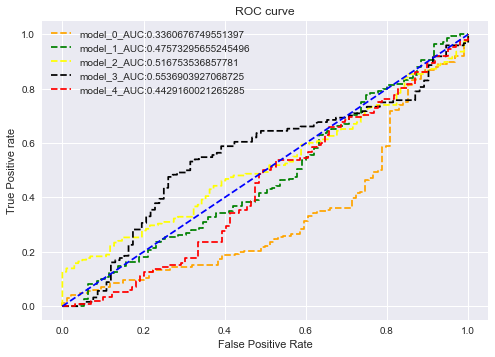

Mean Test Accuracy:60.729226943517325%
Mean Test F1:75.54695001636328%
Mean Test AUC:46.50321126397554%


In [31]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(C),'Experiment_1', svm_c= 0.01)

## Experiment 2: Random but maintain Male/Female Ratio

In [201]:
count(list(np.unique(C.iloc[:,73])))

Total = 168
Asthmatic_male = 90
Asthmatic_female = 68
Healthy_Male = 0
Healthy_female = 0
Asthmatic_male_unique = 46
Asthmatic_female_unique = 28
Before_after = 84
Before_male = 22
Before_female = 20
after_male = 22
after_female = 20
NAsthma = 10


In [224]:
A_M = count(list(np.unique(C.iloc[:,73])),print_dist=False, ret= 'Asthmatic_male')
A_F = count(list(np.unique(C.iloc[:,73])),print_dist=False, ret= 'Asthmatic_female')
before = count(list(np.unique(C.iloc[:,73])),print_dist=False, ret= 'before')
after = count(list(np.unique(C.iloc[:,73])),print_dist=False, ret= 'after')
Asthmatic_M = shuffle(np.concatenate((A_M, before['male'], after['male'])))
Asthmatic_F = shuffle(np.concatenate((A_F, before['female'], after['female'])))

In [225]:
for i in range(0,5):
    Test = np.concatenate((Asthmatic_M[i*12:i*12+12], Asthmatic_F[i*12:i*12+12]))
    Train = np.setdiff1d(Total,Test)
    np.savetxt(f"./before_after_classification_Sets/Experiment_2/Train/train_{str(i)}.txt", Train, '%s')
    np.savetxt(f"./before_after_classification_Sets/Experiment_2/Test/test_{str(i)}.txt", Test, '%s')


  0%|          | 0/5 [00:00<?, ?it/s]

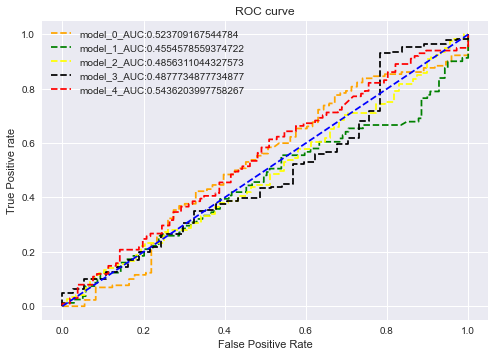

Mean Test Accuracy:58.234583328550784%
Mean Test F1:72.38015247037383%
Mean Test AUC:49.92384030928657%


In [34]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(C),'Experiment_2', svm_c=0.001)

## Experiment 3: Not random, Maintain m/f ratio, After/before ratio

In [318]:
Test = []
before_male = 0
before_female = 0
after_male = 0
after_female = 0
fold = 0

for i in shuffle(Total):
    
    if before_male < 7:
        if i.find("efore") != -1 and i.find("_M_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                before_male +=1
                try:
                    A = i.split("_")
                    A[4] = 'after'
                    if Total.index("_".join(A)) != 0:
                        if after_male < 7:
                            Test.append("_".join(A))
                            after_male +=1
                except:
                    pass
                        
    if after_male < 7:
        if i.find("fter") != -1 and i.find("_M_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                after_male +=1
                try:
                    A = i.split("_")
                    A[4] = 'before'
                    if Total.index("_".join(A)) != 0:
                        if before_male < 7:
                            Test.append("_".join(A))
                            before_male +=1
                except:
                    pass
                
    if before_female < 7:
        if i.find("efore") != -1 and i.find("_F_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                before_female +=1
                try:
                    A = i.split("_")
                    A[4] = 'after'
                    if Total.index("_".join(A)) != 0:
                        if after_female < 7:
                            Test.append("_".join(A))
                            after_female +=1
                except:
                    pass
                        
    if after_female < 7:
        if i.find("fter") != -1 and i.find("_F_") != -1:
            try:
                if Test.index(i) !=0:
                    pass
            except:
                Test.append(i)
                after_female +=1
                try:
                    A = i.split("_")
                    A[4] = 'before'
                    if Total.index("_".join(A)) != 0:
                        if before_female < 7:
                            Test.append("_".join(A))
                            before_female +=1
                except:
                    pass
                
    if len(Test) == 28:
        Train = np.setdiff1d(Total,Test)
        np.savetxt(f"./before_after_classification_Sets/Experiment_3/Train/train_{str(fold)}.txt", Train, '%s')
        np.savetxt(f"./before_after_classification_Sets/Experiment_3/Test/test_{str(fold)}.txt", np.array(Test), '%s')
        fold += 1
        Test = []
        before_male = 0
        before_female = 0
        after_male = 0
        after_female = 0
        if fold == 5:
            break
                
                
            
    

  0%|          | 0/5 [00:00<?, ?it/s]

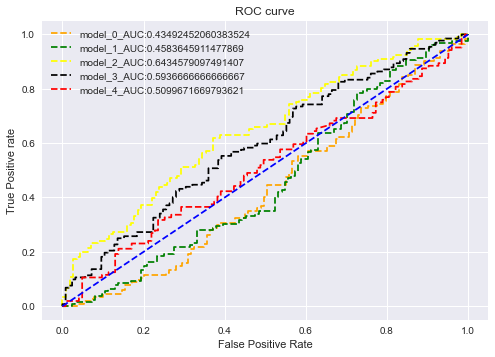

Mean Test Accuracy:52.153734603500766% with SD: 4.699313872999039%
Mean Train Accuracy:100.0%
Mean Test F1:58.248035950303986%
Mean Test AUC:52.807617102935836%


In [38]:
Train_accuracy, Test_accuracy, FPR, TPR, THRESH, AUC, Test_F1 = experiment(shuffle(C),'Experiment_3', svm_c=100)